## AIF module demo

### Import modules

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../src')
import aifs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### The AIF Class
AIF objects define an arterial input function. This can either be a population average function or an AIF based on individual patient measurements.

### Classic Parker AIF
Create a Parker AIF object of the Parker subclass of AIF:

In [3]:
parker_aif = aifs.Parker(hct=0.42)

We can use the c_ap method to get concentration at arbitrary time points:

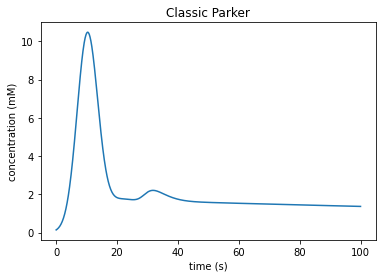

In [4]:
time_parker = np.linspace(0.,100.,1000)
c_ap_parker = parker_aif.c_ap(time_parker)
plt.plot(time_parker, c_ap_parker)
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.title('Classic Parker');

### Patient-specific AIF
Now we create an individual AIF object based on a series of time-concentration data points. We use the PatientSpecific subclass of AIF.

In [5]:
t_patient = np.array([19.810000,59.430000,99.050000,138.670000,178.290000,217.910000,257.530000,297.150000,336.770000,376.390000,416.010000,455.630000,495.250000,534.870000,574.490000,614.110000,653.730000,693.350000,732.970000,772.590000,812.210000,851.830000,891.450000,931.070000,970.690000,1010.310000,1049.930000,1089.550000,1129.170000,1168.790000,1208.410000,1248.030000])
c_p_patient = np.array([-0.004937,0.002523,0.002364,0.005698,0.264946,0.738344,1.289008,1.826013,1.919158,1.720187,1.636699,1.423867,1.368308,1.263610,1.190378,1.132603,1.056400,1.066964,1.025331,1.015179,0.965908,0.928219,0.919029,0.892000,0.909929,0.865766,0.857195,0.831985,0.823747,0.815591,0.776007,0.783767])

patient_aif = aifs.PatientSpecific(t_patient, c_p_patient)

Again, using the c_ap method we can get concentration at arbitrary time points. This is achieved using interpolation function.

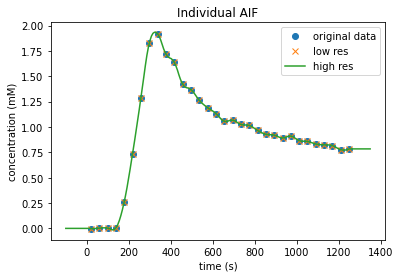

In [6]:
# get the AIF concentrations at original time points
c_p_patient_lowres = patient_aif.c_ap(t_patient)

# get the (interpolated) AIF conc at higher temporal resolution
t_patient_highres = np.linspace(-100, max(t_patient)+100, 200)
c_p_patient_highres = patient_aif.c_ap(t_patient_highres)

plt.plot(t_patient, c_p_patient, 'o', label='original data')
plt.plot(t_patient, c_p_patient_lowres, 'x', label='low res')
plt.plot(t_patient_highres, c_p_patient_highres, '-', label='high res')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.title('Individual AIF');

### Other standard AIF functions
The following function is described in Manning et al., Magn Reson Med. 2021;86:1888–1903.  
It describes the AIF following a bolus injection in a mild-stroke patient population by combining the Parker function with average late-phase concentration profiles measured in patients over a 19-minute acquisition.  
We assume the injection takes place following the acquisition of 3 time frames.

In [7]:
manning_fast_aif = aifs.ManningFast(hct=0.42, t_start=3*39.62)

Manning et al. also reports an AIF for *slow* contrast injections in the same patient population, based on patient measurements:

In [8]:
manning_slow_aif = aifs.ManningSlow()

A similar population average function (for Bolus injection) was reported in Heye et al., NeuroImage 2016;125:446-455:

In [9]:
heye_aif = aifs.Heye(hct=0.45, t_start=3*39.62)

Plot the above AIFs (and the original Parker model) for comparison:

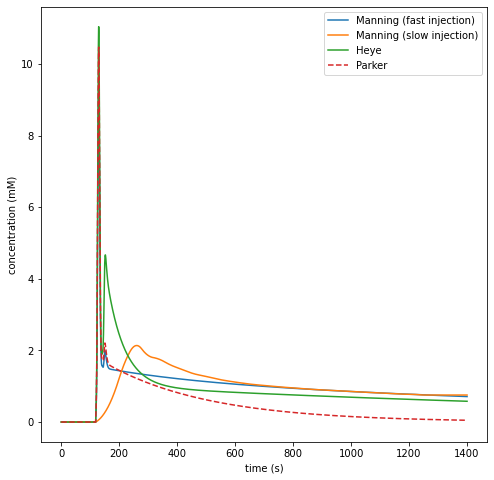

In [11]:
parker_aif = aifs.Parker(hct=0.42, t_start=3*39.62)
t = np.arange(0, 1400, 0.1)

plt.figure(0, figsize=(8,8))
plt.plot(t, manning_fast_aif.c_ap(t), label='Manning (fast injection)')
plt.plot(t, manning_slow_aif.c_ap(t), label='Manning (slow injection)')
plt.plot(t, heye_aif.c_ap(t), label='Heye')
plt.plot(t, parker_aif.c_ap(t), '--', label='Parker')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)');